<a href="https://colab.research.google.com/github/LeftSpoonFish/git_practice/blob/master/mediapipe_face_mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Face Mesh Solution API in Python (see also http://solutions.mediapipe.dev/face_mesh).

In [ ]:
!pip install mediapipe

     |████████████████████████████████| 47.4MB 87kB/s 


Upload any image that contains face(s) to the Colab. We take two example images from the web: https://unsplash.com/photos/JyVcAIUAcPM and https://unsplash.com/photos/auTAb39ImXg

In [143]:
from google.colab import files

uploaded = files.upload()

Saving scarlett-johansson-independent-spirit-awards-2020.jpeg to scarlett-johansson-independent-spirit-awards-2020 (1).jpeg


scarlett-johansson-independent-spirit-awards-2020.jpeg


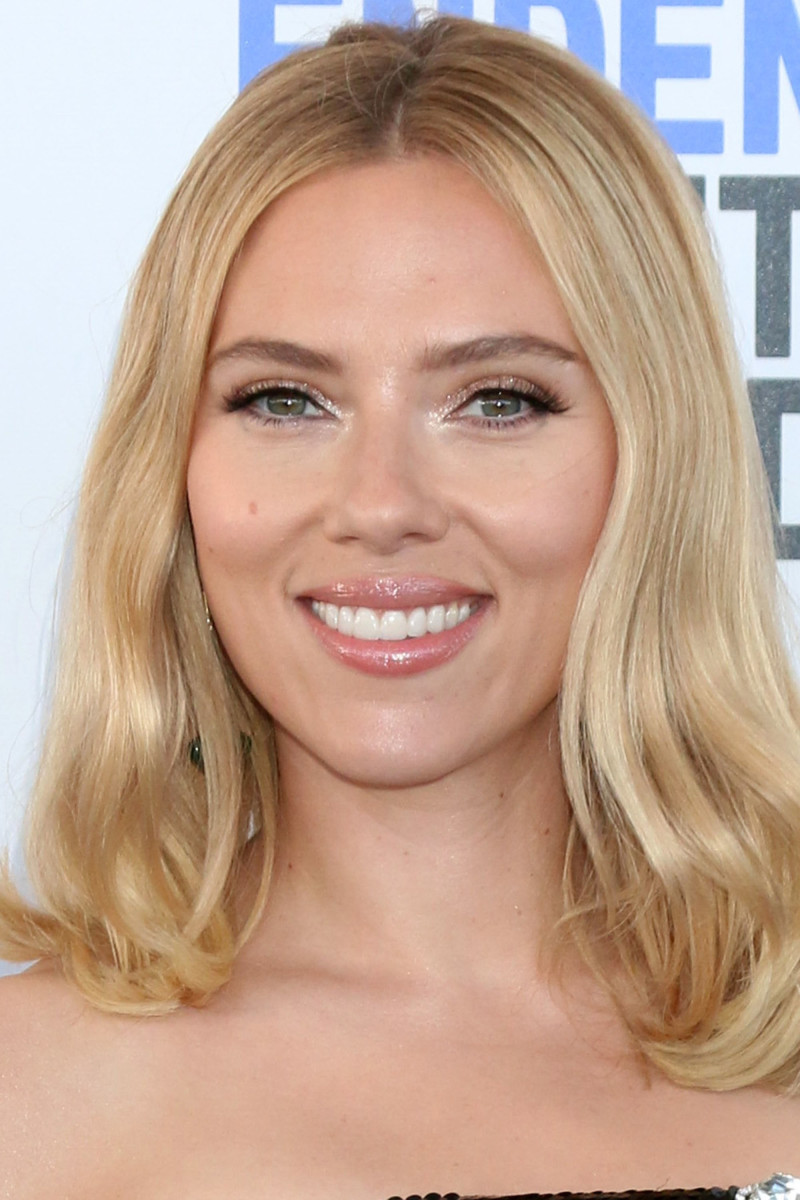

In [144]:
import cv2
from google.colab.patches import cv2_imshow

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

In [145]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

#help(mp_face_mesh.FaceMesh)

In [146]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Face landmarks of scarlett-johansson-independent-spirit-awards-2020.jpeg:


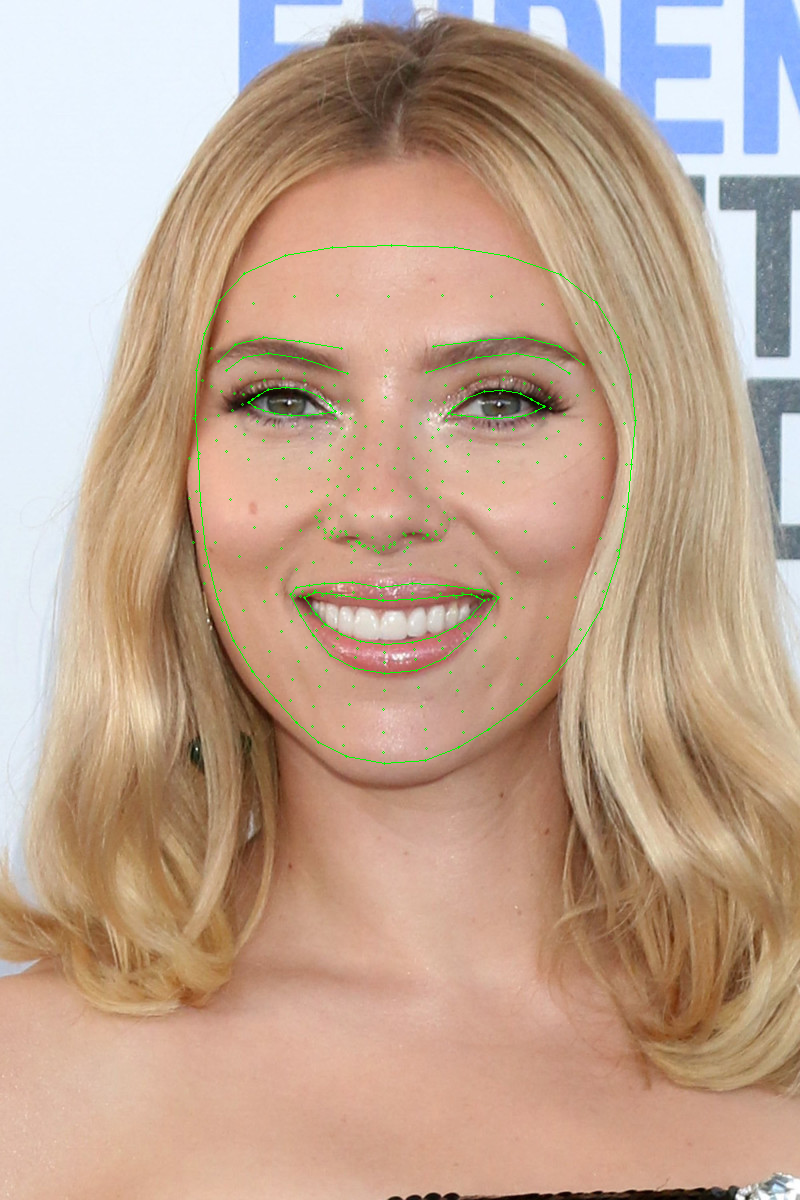

In [147]:
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face landmarks of each face.
    print(f'Face landmarks of {name}:')
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACE_CONNECTIONS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=drawing_spec)
    cv2_imshow(annotated_image)

In [148]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#pip install protobuf_to_dict

  Created wheel for protobuf-to-dict: filename=protobuf_to_dict-0.1.0-cp37-none-any.whl size=3215 sha256=972e1aee222c68dd00ea6a5e4375370c13c2d3ccf80dd8dfa279bf420a8f8eee
  Stored in directory: /root/.cache/pip/wheels/a9/07/a8/9c75ff55a7a3b1521b38fd0aed693cb9610b12e123de39b0dd
Successfully built protobuf-to-dict


In [149]:
keypoints = []
for data_point in face_landmarks.landmark:
    keypoints.append({
                         'X': data_point.x,
                         'Y': data_point.y,
                         'Z': data_point.z,
                         'Visibility': data_point.visibility,
                         })

In [150]:
keypoints[0:6]

[{'Visibility': 0.0,
  'X': 0.4758833348751068,
  'Y': 0.48930108547210693,
  'Z': -0.06039494276046753},
 {'Visibility': 0.0,
  'X': 0.4656720757484436,
  'Y': 0.4475160241127014,
  'Z': -0.14031323790550232},
 {'Visibility': 0.0,
  'X': 0.47253790497779846,
  'Y': 0.46080130338668823,
  'Z': -0.07217984646558762},
 {'Visibility': 0.0,
  'X': 0.45288991928100586,
  'Y': 0.39022010564804077,
  'Z': -0.11098726838827133},
 {'Visibility': 0.0,
  'X': 0.46565765142440796,
  'Y': 0.43034228682518005,
  'Z': -0.15091660618782043},
 {'Visibility': 0.0,
  'X': 0.4684623181819916,
  'Y': 0.40713217854499817,
  'Z': -0.143522709608078}]

In [151]:
#type(keypoints)
print(keypoints[0:])
print()
#print(keypoints[1]['X'])

#type(keypoints[1])
keypoints[0]['Z']

#type(keypoints[1])
xlist = [x['X'] for x in keypoints]
ylist =[y['Y'] for y in keypoints]
zlist =[z['Z'] for z in keypoints]

[{'X': 0.4758833348751068, 'Y': 0.48930108547210693, 'Z': -0.06039494276046753, 'Visibility': 0.0}, {'X': 0.4656720757484436, 'Y': 0.4475160241127014, 'Z': -0.14031323790550232, 'Visibility': 0.0}, {'X': 0.47253790497779846, 'Y': 0.46080130338668823, 'Z': -0.07217984646558762, 'Visibility': 0.0}, {'X': 0.45288991928100586, 'Y': 0.39022010564804077, 'Z': -0.11098726838827133, 'Visibility': 0.0}, {'X': 0.46565765142440796, 'Y': 0.43034228682518005, 'Z': -0.15091660618782043, 'Visibility': 0.0}, {'X': 0.4684623181819916, 'Y': 0.40713217854499817, 'Z': -0.143522709608078, 'Visibility': 0.0}, {'X': 0.4783281087875366, 'Y': 0.3511795997619629, 'Z': -0.08417210727930069, 'Visibility': 0.0}, {'X': 0.3188880681991577, 'Y': 0.33959245681762695, 'Z': 0.034729596227407455, 'Visibility': 0.0}, {'X': 0.482171893119812, 'Y': 0.31371158361434937, 'Z': -0.0720360279083252, 'Visibility': 0.0}, {'X': 0.4827512204647064, 'Y': 0.29241707921028137, 'Z': -0.08086202293634415, 'Visibility': 0.0}, {'X': 0.4897

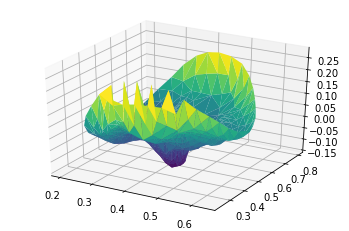

In [152]:
fig=plt.figure()
ax=plt.axes(projection='3d')

zdata = zlist
xdata = xlist
ydata = ylist

#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds')
ax.plot_trisurf(ylist,xlist,zlist,
                cmap='viridis',edgecolor='none')



   
plt.show()

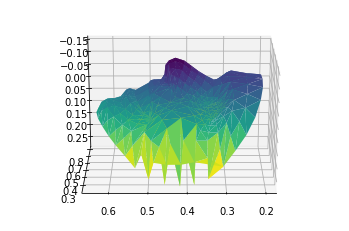

In [153]:
#Better rotation

fig=plt.figure()
ax=plt.axes(projection='3d')

zdata = zlist
xdata = xlist
ydata = ylist

#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds')
ax.plot_trisurf(ylist,xlist,zlist,
                cmap='viridis',edgecolor='none')


# rotate the axes and update
for angle in range(0, 90):
   ax.view_init(200, 90)

plt.show()

In [154]:
#multiple subplots